# 01. Install and import all necessary libraries in your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/yukbuinnemtat/Desktop/Task 6 Folder'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'citi_b.csv'), index_col = False)

In [5]:
df.shape

(42993, 17)

In [6]:
df.head()

,Unnamed: 0,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_date,end_date,end_hour,start_time
0,0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09,2013-09-09,18,2013-09-09 18:00:00
1,1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12,2013-09-12,18,2013-09-12 18:00:00
2,2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18,2013-09-18,19,2013-09-18 19:00:00
3,3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28,2013-09-28,12,2013-09-28 11:00:00
4,4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27,2013-09-27,22,2013-09-27 22:00:00


# 02. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
### *Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
### *Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [7]:
df.columns

Index(['Unnamed: 0', 'days_of_the_week', 'start_hour', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_date', 'end_date',
       'end_hour', 'start_time'],
      dtype='object')

In [8]:
# Drop unwanted columns and categorical columns

# Drop specific columns
columns_to_drop = ['Unnamed: 0', 'days_of_the_week','start_station_name','end_station_name', 'subscriber', 'gender', 'start_time', 'start_date', 'end_date']

df_clean = df.drop(columns=columns_to_drop)

In [9]:
df_clean.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour
0,18,40.754666,-73.991382,40.742388,-73.997262,993,1968.0,18
1,18,40.719392,-74.002472,40.728419,-73.987140,581,1983.0,18
2,19,40.760193,-73.991255,40.768254,-73.988639,361,1989.0,19
3,11,40.743156,-73.974347,40.756014,-73.967416,561,1988.0,12
4,22,40.730287,-73.990765,40.726218,-73.983799,427,1986.0,22


In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
numerical_columns = ['start_hour', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'birth_year', 'end_hour']
df_clean[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [11]:
df_clean.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour
0,0.793598,1.030155,-0.035028,0.424299,-0.486509,0.425070,-0.701594,0.758042
1,0.793598,-0.769729,-0.931846,-0.288323,0.331492,-0.362033,0.669696,0.758042
2,0.996321,1.312157,-0.024805,1.743821,0.210326,-0.782331,1.218212,0.958972
3,-0.625466,0.442829,1.342409,1.119416,1.925312,-0.400242,1.126792,-0.447540
4,1.604491,-0.213828,0.014850,-0.400589,0.601472,-0.656242,0.943954,1.561762


In [12]:
df_clean.shape

(42993, 8)

# 03. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-343944.0000000004,
 -282517.9674581503,
 -250037.87699296742,
 -227216.42178504908,
 -209986.3457657512,
 -194467.91582508874,
 -183304.43109346798,
 -176000.03514393838,
 -169180.89277594144]

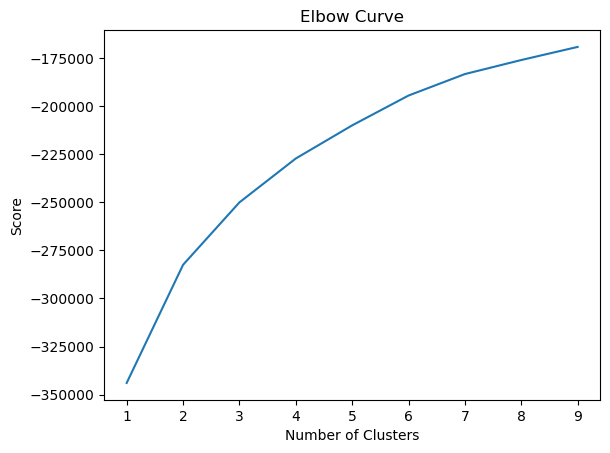

In [16]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Here, there's a large jump from one to two on the x-axis, but after that, the curve is constant. Which means that the optimal count for my clusters is two.

# 05. Run the k-means algorithm.

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_clean)

/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

# 06. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [21]:
df_clean['clusters'] = kmeans.fit_predict(df_clean)

/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df_clean.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour,clusters
0,0.793598,1.030155,-0.035028,0.424299,-0.486509,0.425070,-0.701594,0.758042,1
1,0.793598,-0.769729,-0.931846,-0.288323,0.331492,-0.362033,0.669696,0.758042,1
2,0.996321,1.312157,-0.024805,1.743821,0.210326,-0.782331,1.218212,0.958972,1
3,-0.625466,0.442829,1.342409,1.119416,1.925312,-0.400242,1.126792,-0.447540,0
4,1.604491,-0.213828,0.014850,-0.400589,0.601472,-0.656242,0.943954,1.561762,1


In [23]:
df_clean['clusters'].value_counts()

1    24857
0    18136
Name: clusters, dtype: int64

# 07. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.


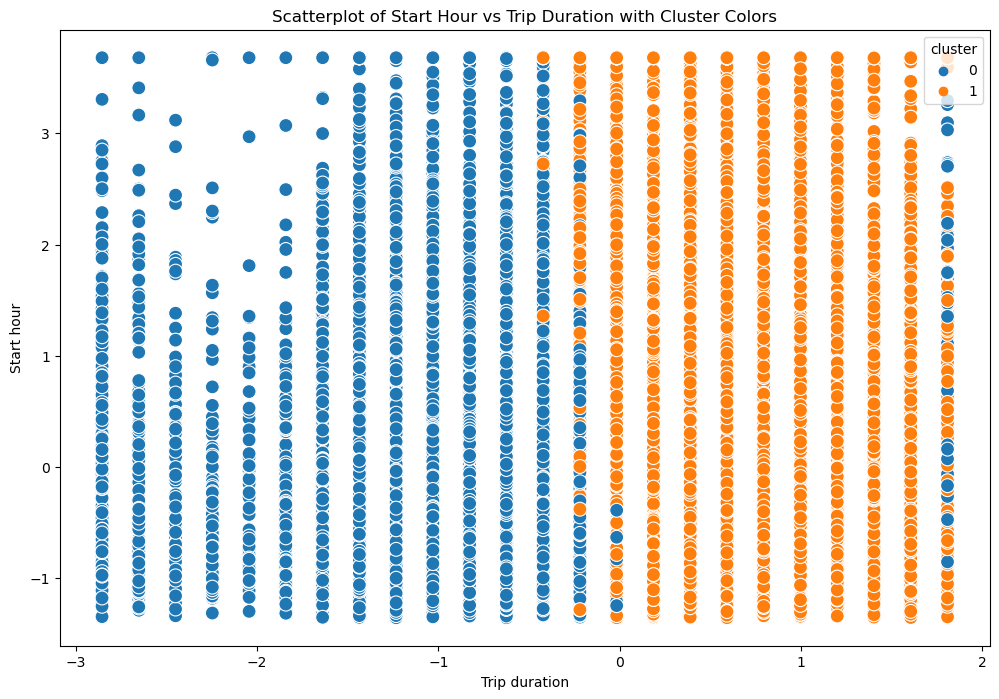

In [48]:
# Scatterplot of two numeric variables ('start_hour' vs 'trip_duration') with clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['start_hour'], y=df_clean['trip_duration'], hue=df_clean['cluster'], s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trip duration') # Label x-axis.
plt.ylabel('Start hour') # Label y-axis.
plt.title('Scatterplot of Start Hour vs Trip Duration with Cluster Colors')
plt.show()

/Users/yukbuinnemtat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


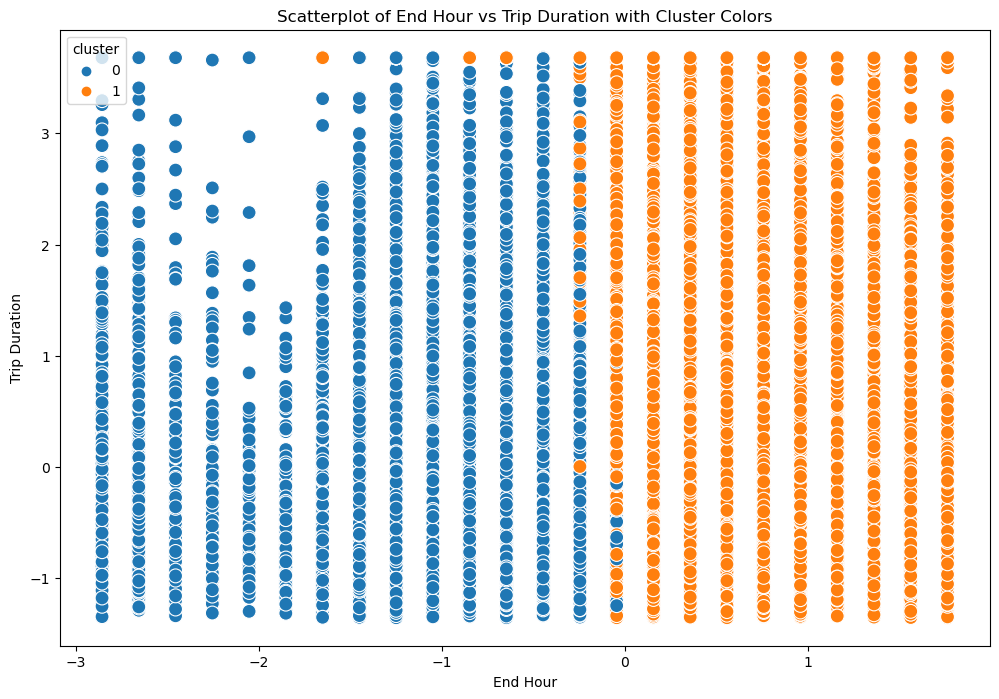

In [49]:
# Plot the clusters for the "House Age" and "trip_duration" variables.

# Run K-means clustering with the optimal number of clusters 
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df_clean)

# Add the 'cluster' column to your DataFrame
df_clean['cluster'] = kmeans.labels_

# Scatterplot of two numeric variables ('start_hour' vs 'trip_duration') with cluster colors
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_clean['end_hour'], y=df_clean['trip_duration'], hue=df_clean['cluster'], s=100)
ax.grid(False)
plt.xlabel('End Hour')
plt.ylabel('Trip Duration')
plt.title('Scatterplot of End Hour vs Trip Duration with Cluster Colors')
plt.show()

# 09. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [52]:
df_clean.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'end_hour':['mean', 'median'], 
                         'trip_duration':['mean', 'median'],
                          'birth_year':['mean', 'median']})

start_hour            end_hour           trip_duration            \
              mean    median      mean    median          mean    median   
cluster                                                                    
0        -0.976017 -1.030912 -0.989263 -1.050330     -0.105175 -0.356302   
1         0.712115  0.590874  0.721779  0.758042      0.076737 -0.224481   

        birth_year            
              mean    median  
cluster                       
0        -0.089574  0.121180  
1         0.065355  0.304019

##### The analysis of mean and median of the clusters by columns shows further interesting relationships that are illustrated below in cluster plots

# 10. Propose what these results could be useful for in future steps of an analytics pipeline.

##### This analysis is helpful in terms of understanding the relationship between variables, and can inform resource allocation decisions. 
##### The information can also be used to forecast bike demand in different areas and at different times.